In [ ]:
#Load the libraries needed
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#import CIFAR10 libary and spilt data using tensorflow keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#add class labels, we need to this is because the CIFAR10 libary labels the classes as interger values
class_names = ["0","1","2","3","4","5","6","7","8","9"]


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#part I show sizes

#sizes are printed by printing the shape of the array (N,pixels x, pixels y, N of channels such as RGB or CMYK)
print("Train shape: " ,train_images.shape)
print("Train labels: " ,len(train_labels))
print("Test shape: ", test_images.shape)
print("test Labels: ", len(test_labels))
print("test lables as class number: ", test_labels[:5])
print("class labels as text: ", class_names)



Train shape:  (60000, 28, 28)
Train labels:  60000
Test shape:  (10000, 28, 28)
test Labels:  10000
test lables as class number:  [7 2 1 0 4]
class labels as text:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


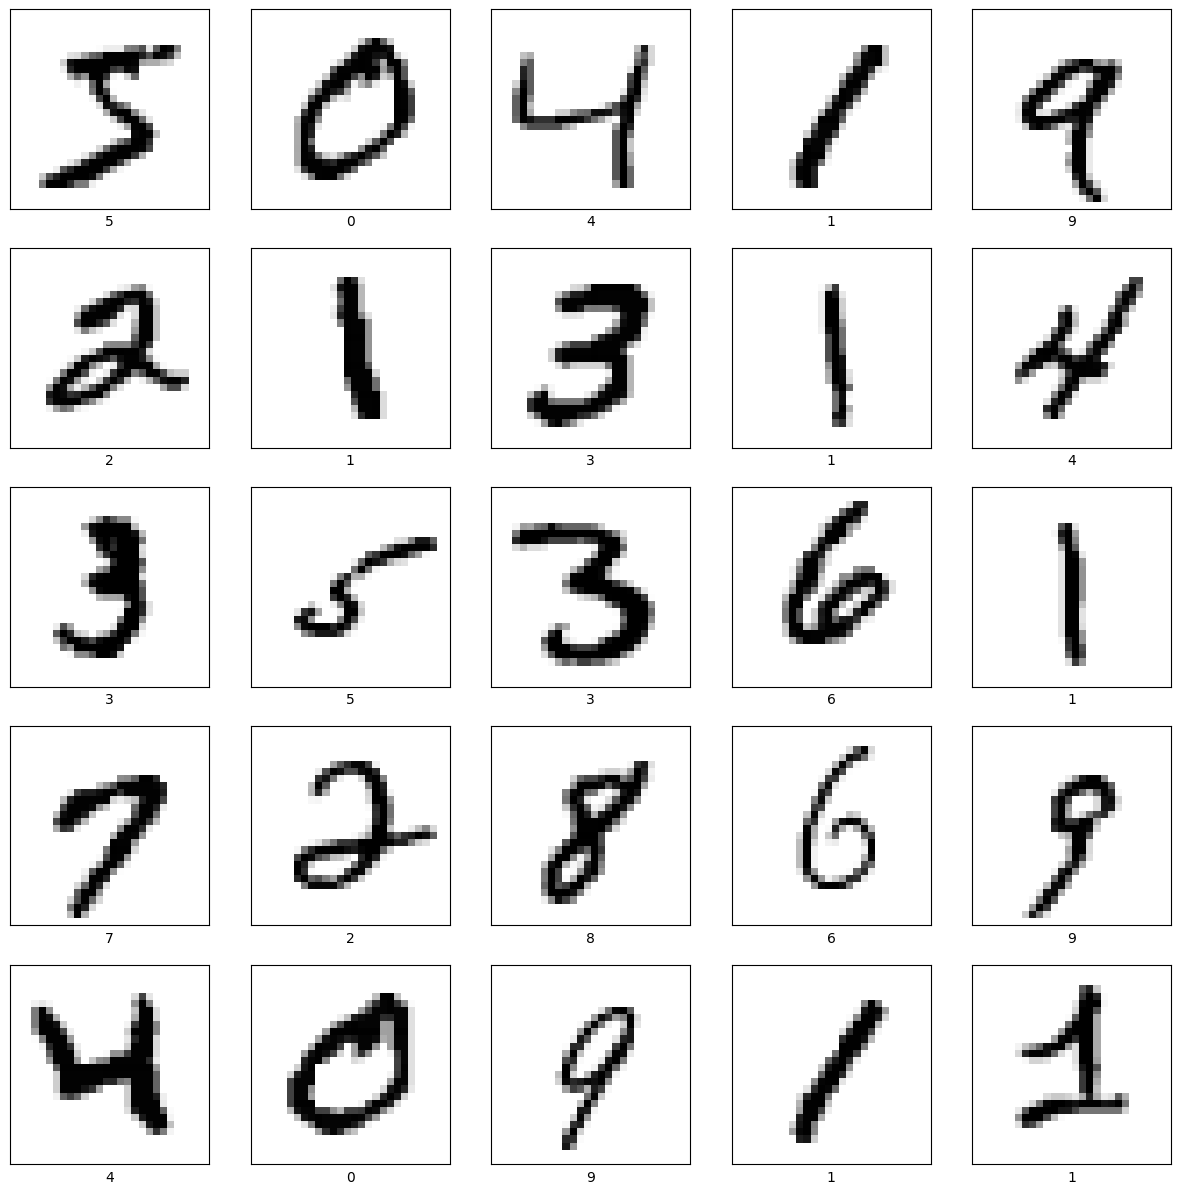

In [ ]:
#part 2 graphing


plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1) # subplot allows to print a grid of images Nx,Ny, and image N
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #cmap is colour map
    plt.xlabel(class_names[int(train_labels[i])]) #prints label by using int class value as index for class_labels
plt.show()

In [ ]:
#part 3 data processing and pre processing
train_images = np.expand_dims(train_images, -1) #adding or removing axis or something
test_images = np. expand_dims(test_images, -1)
train_images = train_images / 255.0 #dividing the values by 255 will scale them from 0-255 to 0-1, needed for NN to work
test_images = test_images / 255.0



Epoch 1/5
1875/1875 [==============================] - 281s 149ms/step - loss: 0.1521 - accuracy: 0.9544 - val_loss: 0.0467 - val_accuracy: 0.9855
Epoch 2/5
1875/1875 [==============================] - 291s 155ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0446 - val_accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 279s 149ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 284s 152ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0417 - val_accuracy: 0.9883
Epoch 5/5
1875/1875 [==============================] - 282s 150ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0339 - val_accuracy: 0.9894
313/313 - 7s - loss: 0.0339 - accuracy: 0.9894 - 7s/epoch - 23ms/step
model Accuracy : 0.9894000291824341


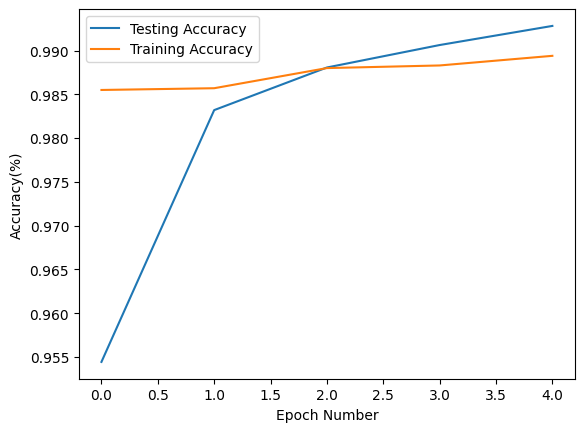

In [ ]:
#part 4/5 Designing convolutional network and adjusting parameters

#conv2d are convolutional layers(N of output filters, kernal size h/width of convulational layer)
#maxpool2d, reduces matrix to a single pixel done to remove extra data but preserve feautures
#droput removes some nodes to prevent overfitting this removes overfitting
#dense ANN returns probability of the image being in a certain category (for us this is n=10)
#flatten converts tensors into 1d

model = tf.keras.models.Sequential([
 tf.keras.layers.BatchNormalization(input_shape=train_images.shape[1:]),
 tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu'),
 #tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
 tf.keras.layers.Dropout(0.10), #remove some nodes to reduce overfitting
 tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
 #tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Dropout(0.1), #remove some nodes to reduce overfitting
 tf.keras.layers.Flatten(), #1d reducer
 tf.keras.layers.Dense(64,activation='relu'), #ANN classifer
 tf.keras.layers.Dropout(0.1), #remove some nodes to reduce overfitting
 tf.keras.layers.Dense(10,activation='softmax'), #ANN final classifier layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

#Adapted from https://www.tensorflow.org/tutorials/images/cnn tutironal
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Training Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy(%)')
plt.legend()
testing_loss, testing_accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print("model Accuracy :", testing_accuracy)

Epoch 1/10
1875/1875 [==============================] - 258s 136ms/step - loss: 0.1313 - accuracy: 0.9603 - val_loss: 0.0536 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 254s 136ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0360 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 255s 136ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0410 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 258s 138ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 252s 135ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0431 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 257s 137ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0471 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 257s 137ms/step - loss: 0.0122 - accuracy: 0.9958 - val_

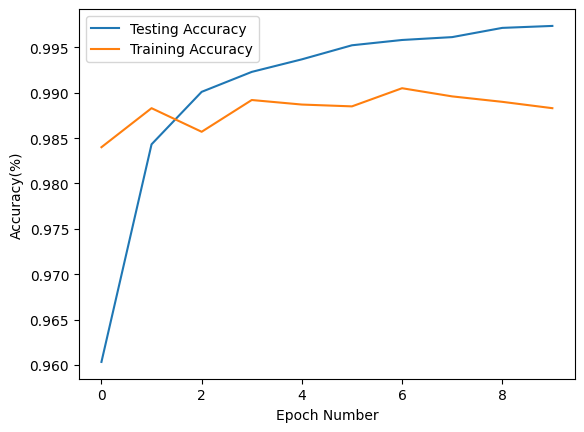

In [ ]:
#part 4/5 Designing convolutional network and adjusting parameters

#conv2d are convolutional layers(N of output filters, kernal size h/width of convulational layer)
#maxpool2d, reduces matrix to a single pixel done to remove extra data but preserve feautures
#droput removes some nodes to prevent overfitting this removes overfitting
#dense ANN returns probability of the image being in a certain category (for us this is n=10)
#flatten converts tensors into 1d

model = tf.keras.models.Sequential([
 tf.keras.layers.BatchNormalization(input_shape=train_images.shape[1:]),
 tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu'),
 #tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
 #tf.keras.layers.Dropout(0.05), #remove some nodes to reduce overfitting
 tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
 #tf.keras.layers.MaxPooling2D(),
 tf.keras.layers.Dropout(0.05), #remove some nodes to reduce overfitting
 tf.keras.layers.Flatten(), #1d reducer
 tf.keras.layers.Dense(64,activation='relu'), #ANN classifer
 tf.keras.layers.Dropout(0.1), #remove some nodes to reduce overfitting
 tf.keras.layers.Dense(10,activation='softmax'), #ANN final classifier layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

#Adapted from https://www.tensorflow.org/tutorials/images/cnn tutironal
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Training Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy(%)')
plt.legend()
testing_loss, testing_accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print("model Accuracy :", testing_accuracy)